<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/EDA_Corr_Cov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls

data.csv  sample_data


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('data.csv',header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
diagnosis = data.loc[:,'diagnosis']
df = data.iloc[:,[0,2,3,4,5,6,7,8,9]] # remove 10,11 as they are bad variables
df.head()
# MU, SIGMA -> everytime i add a value (new data) -> Mu/Sigma change 
# 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


In [24]:
df_with_na = df.isna() # detect null values

for col in df.columns:
  filtered_data = df_with_na[df_with_na[col]==True]
  print(filtered_data) # handle missing values



Empty DataFrame
Columns: [id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean]
Index: []
Empty DataFrame
Columns: [id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean]
Index: []
Empty DataFrame
Columns: [id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean]
Index: []
Empty DataFrame
Columns: [id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean]
Index: []
Empty DataFrame
Columns: [id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean]
Index: []
Empty DataFrame
Columns: [id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean]
Index: []
Empt

In [0]:
df.describe().T
#df.info()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.00000,869218.00000,906024.00000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.98100,11.70000,13.37000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.71000,16.17000,18.84000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.79000,75.17000,86.24000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.50000,420.30000,551.10000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.05263,0.08637,0.09587,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.01938,0.06492,0.09263,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.00000,0.02956,0.06154,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.00000,0.02031,0.03350,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.10600,0.16190,0.17920,1.957000e-01,3.040000e-01


In [0]:
# I increase, You increase -> POSITIVE CORR -> GOOD
# I increase, you decrease -> NEGATIVE CORR -> GOOD! INVERSELY PROPORTIONAL
# I increase, you dont care-> NO CORR -> USELESS! 0 correlation
# -1 to 1 is our scale 
# ID should be useless for all the other variables <- hence proved
# ID should be useless even for output -> M/B aka Diagnosis

correlations = df.corr()

In [0]:
c2 = correlations[correlations<0.1]
c2

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,NaN,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.05008,0.044158,-0.022114,-0.052511
radius_mean,0.074626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.311631
texture_mean,0.099770,NaN,NaN,NaN,NaN,-0.023389,NaN,NaN,NaN,0.071401,-0.076437
perimeter_mean,0.073159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.261477
area_mean,0.096893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.283110
smoothness_mean,-0.012968,NaN,-0.023389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,0.000096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_mean,0.050080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,0.044158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symmetry_mean,-0.022114,NaN,0.071401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


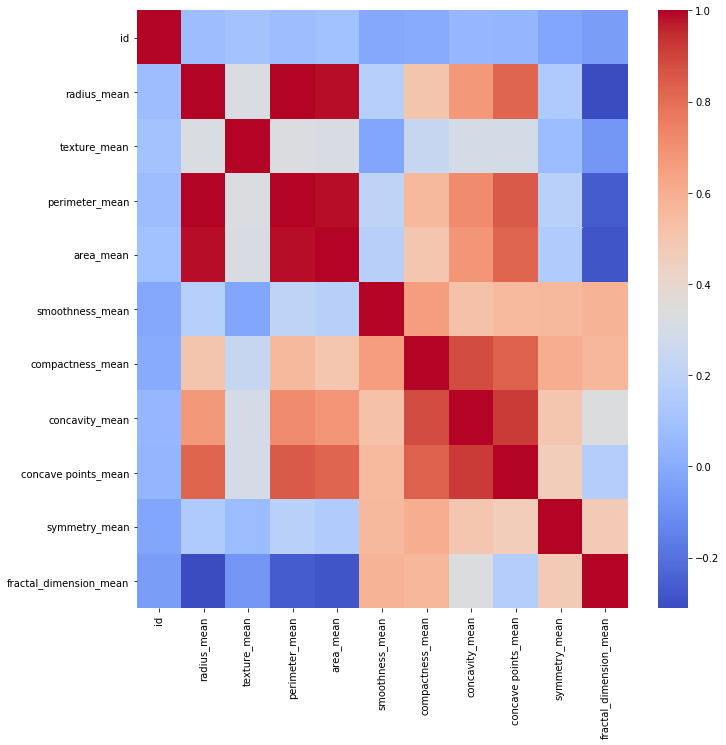

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(correlations, cmap='coolwarm')
plt.show()
# Entire graph blue -> useless data altogether! 
# entire data red -> very strong formula 
# POWER BI 
plt.savefig('blah.png')

# GRID SEARCH => exhaustive combinations and permutaions 

In [0]:
# SCATTER DISTRIBUTION
# M and B
# PLOT DISTRIBUTION of Radius v/s Smoothness separately wrt M and B
# r < 0.03 was always benign 
# r > 0.93 
# Within boundaries of your data, we can break categories and plot data only inside them. 
# this helps you identify limits within which your data works

In [26]:
color_dic = lambda c: 'red' if c=='M' else 'blue'
y = diagnosis.map(color_dic)
y.head()

0    red
1    red
2    red
3    red
4    red
Name: diagnosis, dtype: object

<Figure size 2880x2880 with 0 Axes>

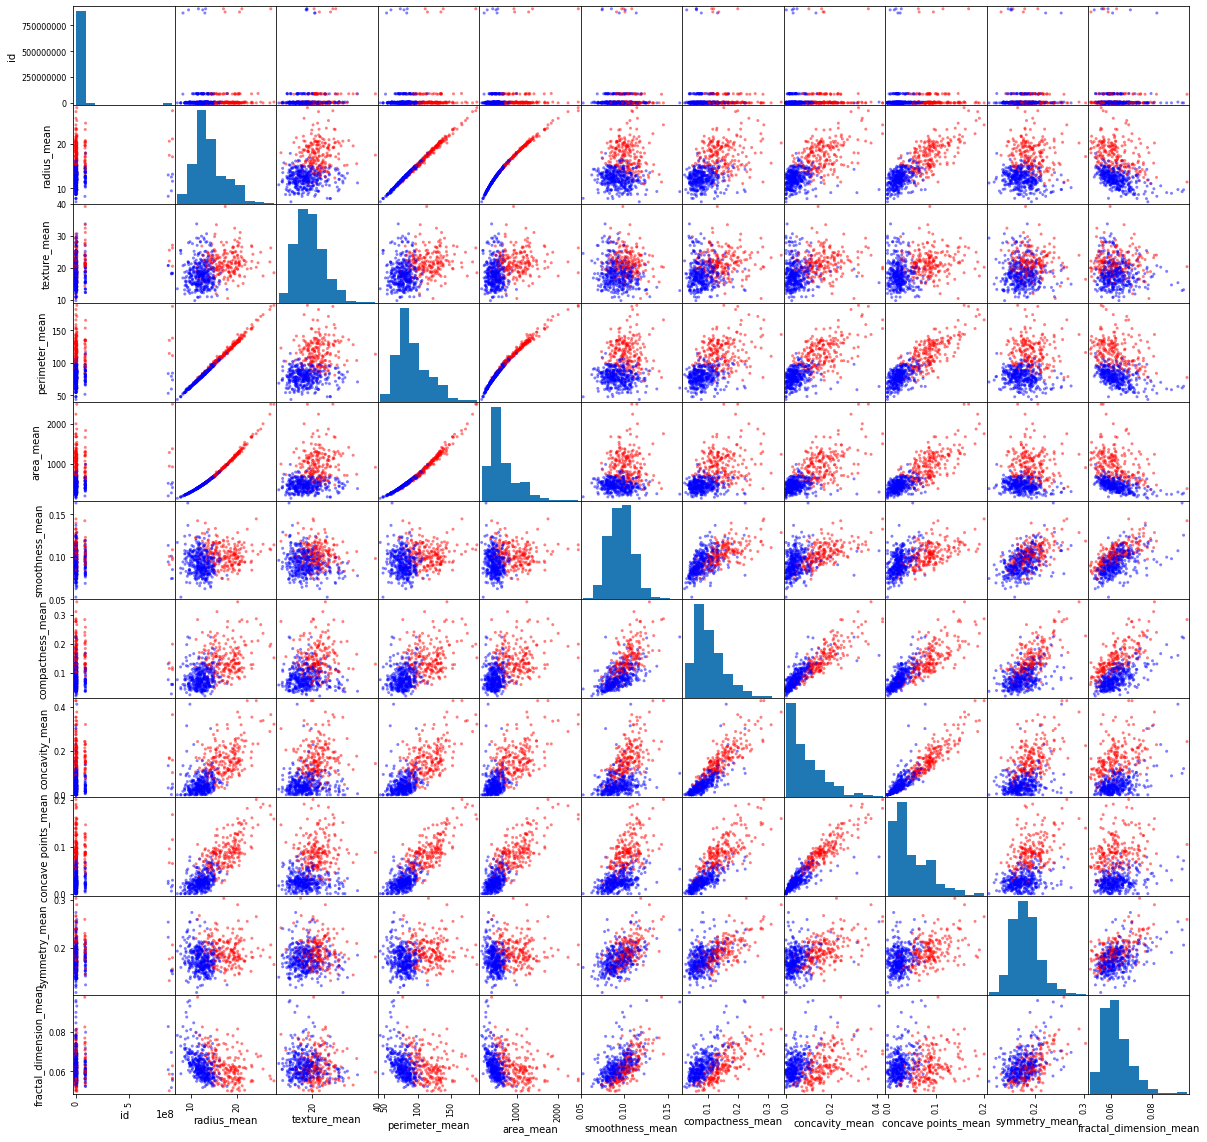

<Figure size 432x288 with 0 Axes>

In [0]:
sm = pd.plotting.scatter_matrix(df,c= y, figsize=(20,20))
plt.show()
plt.savefig('draw.png')
# SINCE ID is useless, we need to handle it 

In [27]:
df = df.set_index('id')
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
id,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


Z-score -> normalize data. It will make the mean 0, and by taking SIGMA as normalizing factor, it will all values between -inf to +inf. <-3 and >3, can be discarded as outliers. And your data will become in same scale. 


Why do we need to do that?
ML -> y = mx + c
y = m1x1 + m2x2 + c
m1*17.99 + m2*0.11840 + c
y-> output # diagnosis
x-> input # collection of rows of data in an excel sheet
m,c -> learned by computer -> ML 
m1 = 0.1, m2=0.2
0.1 * 17.99      0.99 * 0.111
# NORMALIZATION -> SO that all variables become in same scale, no body is extremely larger or smaller than the other

-> how big the value of m2 is (its not going to be 100s!!), because of x1, this equation has already tilted in the direction of first variable


ALL CONTINUOUS NUMERICAL DATA MUST BE NORMALIZED

ALL CATEGORICAL DATA MUST BE ENCODED  

In [28]:
# Z-Score -> Numercial data normalization 
# batch way -> your new data point becomes part of data itself -> then values of std, mu, z-score/ renormlized, recalculate,
# relearnt. Changes happen slowly, over a period of time-> recommendations, chatbots, computer vision, profit/loss
# Real-time -> your new point point is first normalized, then passed to model directly -> smart car, IoT, Robotics

stats = df.describe().T
mu = stats['mean']
sigma = stats['std']
z_scores = (df-mu)/sigma
z_scores.head()
# y = mx + c! now all x1, x2,x3.. xn are in the same scale! 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
id,,,,,,,,
842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249
842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662
84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440
84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431
84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237


In [0]:
#Data is normalized, i can begin learning on it
#diagnosis # ML can only happen on numbers 
# M-> red, B-> blue 
logic = lambda x: 1 if x=='M' else 0 # LABEL ENCODING
y = diagnosis.map(logic) # DF containing a single series 
# y['diagnosis'].to_numpy() => would have converted df to series
# DF has MANY SERIES bound by same index
#y[:20] # OUTPUTS IN Y
x = z_scores # normalized input 
# Now we are ready to split the data 
# train_test_split -> your rules of shufflint, and splitting are mantained
 # PYTHON! 
 # END OF DATA CLEANING 

In [0]:
# MODEL SELECTION 
# WILL BE COMPARING MULTIPLE ALGOS 
# HOW TO COMPARE? 
# ACCURACY -> Right number of guesses/ total number of guesses 
# TIME -> should be within human tolerance 
# Blue, Blue, White, Blue, Green, Green 
# BLUE -> The data set's color 
# 3/6 = 0.5 <- this is my accuracy! 


# M B M B M
# B B M M M
# W R R W R
# 3/5 <= accuracy


# I should be 0.5 accurate for entire dataset or majority dataset
# if i break my dataset into multiple subsets, then my assumption should be 
# true there also
# {Blue, Blue}, {White, Blue}, {Green, Green}
# 2/2 = 100%, 1/2 = 50%, 0/2 = 0%
# MORE THE SUBSETS, better realization of your data
# at least 5 
# BROKE my dataset-> realized that ACCURACY was flawed!!! its not consistent!
# CROSS VALIDATION -> helps find acc in subsets of data
# idea is to check for consistency, all vals need to be nearby
# K number of FOLDS-> k-fold cross validation 
# PERMUATION -> a lots and lots of permutations are created which 
# is COMPUTATIONALLY VERY EXPENSIVE
# 1-4 folds are too less, 10-15 are too much
# leave 1 fold, the number of permutations are going to down by k!
# FACTORIAL -> k! 
# leaving 1 and leaving k folds are also popular algorithms are they are 
# able to execute faster 
# OVERFITTING -> one fold has overfitted your entire model
# CHANGE THE MODEL, reshuffle the data, hyperparameter tuning
# Just checking whether the predictions you did for your data, are they
# even correct or not 
# WITH existing model, are my subsets of data behaving in the same way
# as rest of my data?
# 1000 rows -> add 1 more row -> 1001 rows
# total importance= 1, importance of each row was 1/1000
# 1/1001 -> changes wouldn't have been major
# BULK -> BATCH => waits for a bulk of data to be accumulated
# the values of mu, sigma, k-fold will change as data will increase by a few tens
# or hundreds of rows
# ACCURACY cannot be trusted alone <- this is why Cross Validate 
# its not a bad practice to freeze the value of Mu and Sigma even for future 
# data -> when data changes significantly, update mu and sigma
# EXPERIMENT -> we did at least 3 times -> 233.3333334 mg 
#  MULTIPLE TIMES -> 235mg, 233mg, 234mg 
# AVERAGE of all my attempts -> 233 mg is the right answer
# am i 100% correct? NO! I am as nearly correct as possible
# 3 factors to find how good or bad an algo(Model) is
# 1) ACCURACY, 2) CVS, 3) TIME 
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
time_all = []
acc_all = []
cvs_all = []

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

#Compare different algos now


In [38]:
# First i am going you no explanation of what ML algo does behind the scene, only
# how to use
# Second, we will build our own algo 
# Advanced algos 
# BigData -> DataBricks or HDInsight 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
models = [SGDClassifier(), SVC(), LinearSVC(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier() ]
algoName = ['Stoch. Grad. Desc.','SVC', 'LinearSVC', 'Sherlock', 'KNN','Decision Tree', 'RandomForest']
# CLUSTERING -> K-means 
for i,model in enumerate(models):
  model = model
  startime = time.time()
  # write your code here
  # first take the model(aka ALGO, BOUNDARY, Y) and FIT it into your data
  model.fit(xtrain, ytrain) # FITTING -> take the algo and try to draw it on
  # your data -> training your algo 
  predictions = model.predict(xtest)
  # i already know the correct answer in ytest
  # so we compare predictionv v/s ytest
  endtime = time.time()
  accuracy = accuracy_score(predictions, ytest) # M, B -> Correct guess/total guess
  cvscore = cross_val_score(model, x, y, cv=5)
  timetaken= endtime -startime
  print("Algo name" + algoName[i])
  print("Time = " + str(timetaken))
  print("Acc = "+ str(accuracy))
  print("CV = ")
  print(cvscore)
  time_all.append(timetaken)
  cvs_all.append(cvscore)
  acc_all.append(accuracy)

# ALL INFORMATION IS GOOD INFO
# DON"T REMOVE VARIABLE TILL YOU DO THIS TEST
# TRY BEHAVIOR OVER MULTIPLE ALGOS to come to a generic conclusion
# NORMALIZATION gave me better acc and CVS than unnormalized data. 
# per 1000 rows of data -> 5 lines are tolerable 
# MISSING values (NULL, ,None, NaN) are not ok-> either fix them or drop them
# outliers -> per 1000 rows of data-> 5 lines are tolerable
# MODEL cannot perform data cleaning -> YOU NEED TO DO IT MANUALLY 


Algo nameStoch. Grad. Desc.
Time = 0.003981351852416992
Acc = 0.9385964912280702
CV = 
[0.87719298 0.92105263 0.94736842 0.94736842 0.81415929]
Algo nameSVC
Time = 0.004970550537109375
Acc = 0.9824561403508771
CV = 
[0.92105263 0.94736842 0.94736842 0.97368421 0.92035398]
Algo nameLinearSVC
Time = 0.00739288330078125
Acc = 0.9473684210526315
CV = 
[0.89473684 0.93859649 0.95614035 0.95614035 0.92920354]
Algo nameSherlock
Time = 0.0024275779724121094
Acc = 0.9385964912280702
CV = 
[0.85964912 0.92105263 0.9122807  0.94736842 0.92920354]
Algo nameKNN
Time = 0.006129264831542969
Acc = 0.9385964912280702
CV = 
[0.90350877 0.92105263 0.92105263 0.95614035 0.92035398]
Algo nameDecision Tree
Time = 0.003743886947631836
Acc = 0.9122807017543859
CV = 
[0.92982456 0.90350877 0.89473684 0.94736842 0.94690265]
Algo nameRandomForest
Time = 0.18110275268554688
Acc = 0.9473684210526315
CV = 
[0.90350877 0.93859649 0.94736842 0.97368421 0.95575221]


Prob. Distribution is as follows:

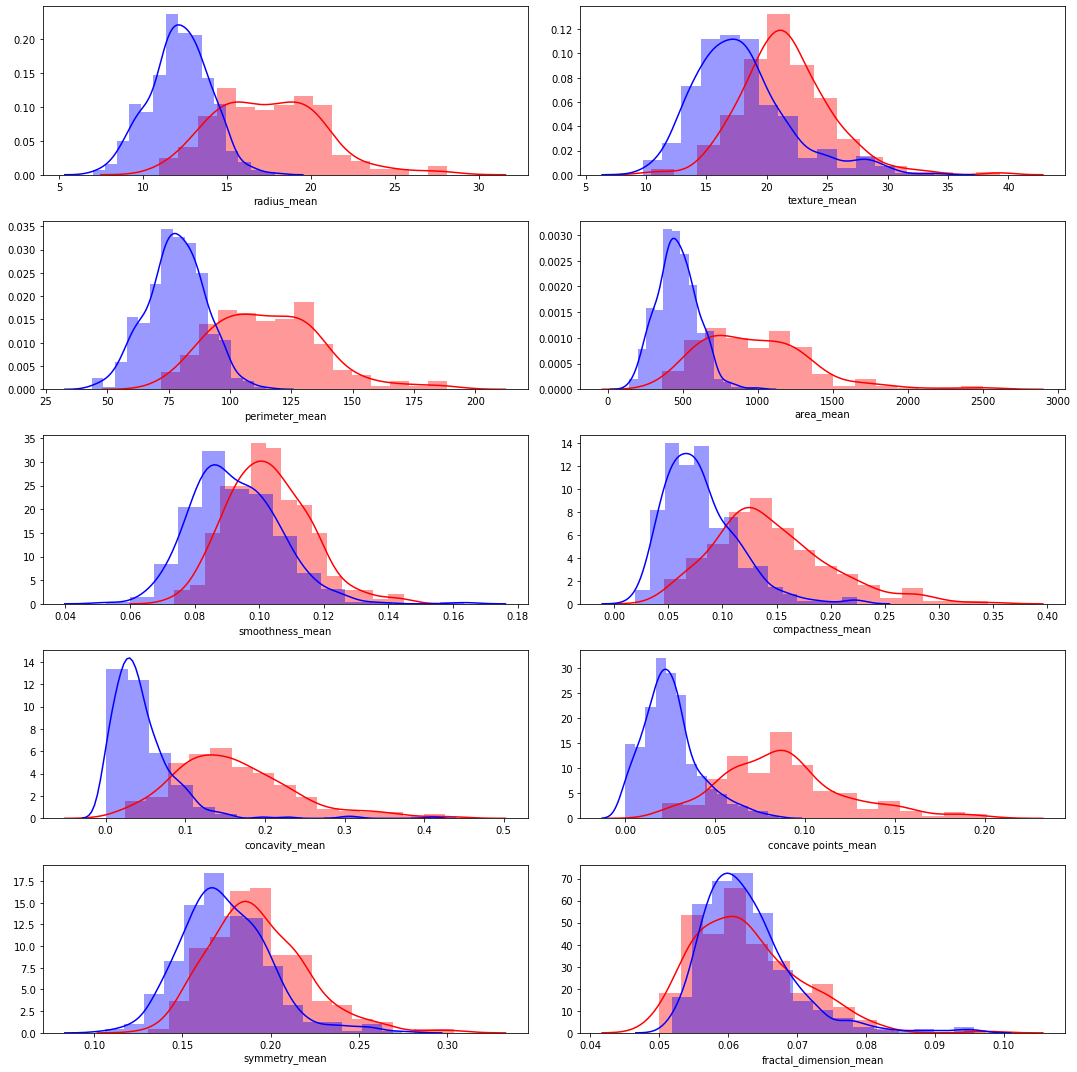

In [0]:
# Code to view distribution of the data
df2 = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
df2 = df2.set_index('id')
plt.figure(figsize=(15,15))
for i,col in enumerate(df.columns):
  # 10 variables = 5 rows, 2 columns
  plt.subplot(5,2,i+1) # id of the graph starts with 1
  sns.distplot(df2[df2['diagnosis']=='M'][col],bins=15,color='red')
  sns.distplot(df2[df2['diagnosis']=='B'][col],bins=15,color='blue')
plt.tight_layout()
plt.show()

Assume I have to teach you a table of 2. In order to teach you, I SHOULD KNOW TABLE OF 2!
Y = f (X1, X2) -> MACHINE LEARNING -> HOW TO CREATE THIS FUNCTION IS ML, a function created and ready-to-use is AI. 
X1   x2    Y
2    1      2
2     2     4
3     2     6
2    3     6
4    2     8

How will i teach you?
FIRST, i will tell you both input and output
2 ,1 = 2
2, 3 = 6
4, 2 = 8

THEN, i will test you- by providing only input and asking you what do you think is the answer?

3, 2 = ?
YOU will say= 42
NO! You 've made a mistake <- how to caLCULATE the mistake, how to measure it? 
3,2 = ?
YOU will say= 8,
NO! but, much better than before. How much mistake you made

You will start making right guesses because I am correcting you on every point. And telling you how much to correct. 

Training and Testing Data. 


train-> xtrain, ytrain 
test -> xtest -> algo gives you predictions
You already know ytest-> so compare predictions against known answers (ytest). 

1) TRAINING DATA > TESTING DATA 
2) I cannot test you on anything i didnot train you on! NO UNIQUE CASES CAN BE PART OF TESTING DATA. 
3) NO REPETATION 
4) NO MAGIC NUMBERS -> in temp of human body, if you see 287 degrees, you know its wrong! sensor error (or typo!)-> numbers that do not make logical sense
5) don't create your own hidden meanings -> LARGER CATEGORIES or BROADER CATEGORIES INSTEAD OF TOO MANY CATEGORIES (TRY MERGING CATEGORIES?) 
 

